# Example usecase
Filtering the HiRISE database for stacks of consecuitive images of Martian North Polar Scarps

In [1]:
from Core.mars_index import ImageIndex
index = ImageIndex()

RDRCUMINDEX.TAB already exists. Set `reload = True` to force download.
RDRCUMINDEX.LBL already exists. Set `reload = True` to force download.
DATASET SIZE ......................................... 100362 images


### Filtering
We begin by applying a sequence of filters with their default parameters defined in [config.yaml](configs/config.yaml)

In [2]:
# Apply various filters in sequence
index.latitude_filter();
# index.show_on_map(target='img_footprint', color = 'cyan', title = 'latitude_flt')

index.season_filter();
# index.show_on_map(target='img_footprint', color = 'cyan', title = 'season_flt')

index.scale_filter();
# index.show_on_map(target='img_footprint', color = 'cyan', title = 'scale_flt')

index.density_filter();
# index.show_on_map(target='cluster', title = 'density_flt')

index.keyword_filter();
# index.show_on_map(target='cluster', title = 'keyword_flt')

LATITUDE FILTER ........................................ 6134 images
SEASON FILTER .......................................... 3270 images
SCALE FILTER ........................................... 2068 images
DENSITY FILTER ......................... 319 locations / 1505 images
KEYWORD FILTER ........................... 66 locations / 371 images


### Fine-tuning
Here we fine-tune the `temporal_filter()` without commiting the changes (`commit=False`). This lets us see how many locations are retained given a set of custom constraints and the distribtuion of these locations across the map. We decide to keep only those locations imaged for at least $5$ consecutive years. Once we are satisfied with our selection we set `commit=True` and move on to product preview.

TEMPORAL FILTER .......................... 32 locations / 249 images


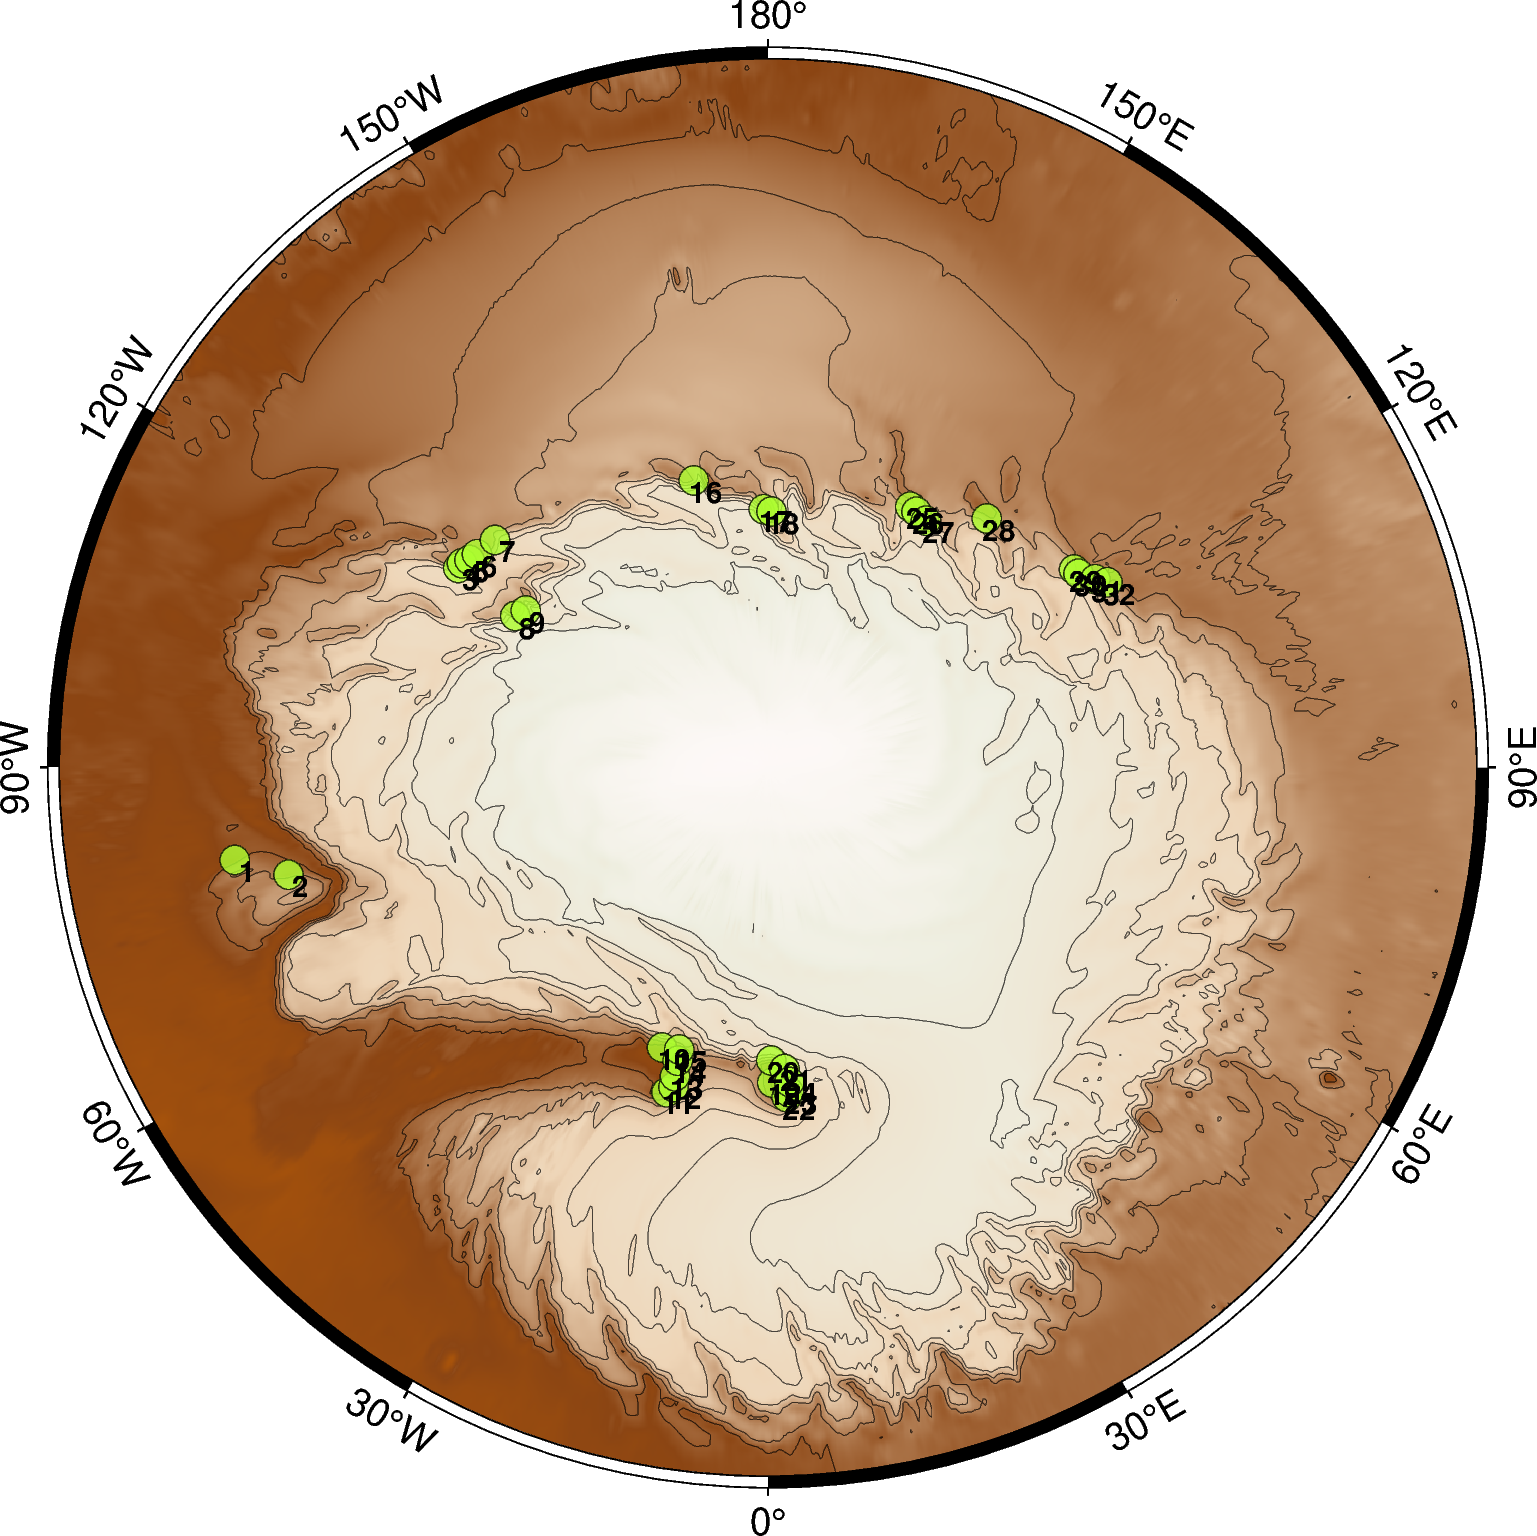

In [5]:
index.temporal_filter(min_years=3, max_gap=1, commit=True);
index.show_on_map('cluster', color='greenyellow')

### Preview
If for our analysis we fancy any location in particular, we have the option to scout it out. The HiRISE archive contains low-res thumbnails for each full-scale .JP2 product. Fetching these takes a few seconds and lets us perform additional quality control before commiting to a full download. We choose location $3$ and after reviewing its content decide that `PSP_001800_2640_RED` looks foggy (possibly cloud obstruction) and therefore should be excluded from further processing.

ESP_018928_2640_RED.thumb.jpg downloaded successfully.
ESP_019034_2640_RED.thumb.jpg downloaded successfully.
ESP_027631_2640_RED.thumb.jpg downloaded successfully.
ESP_036809_2640_RED.thumb.jpg downloaded successfully.
ESP_053292_2640_RED.thumb.jpg downloaded successfully.
ESP_054149_2640_RED.thumb.jpg downloaded successfully.


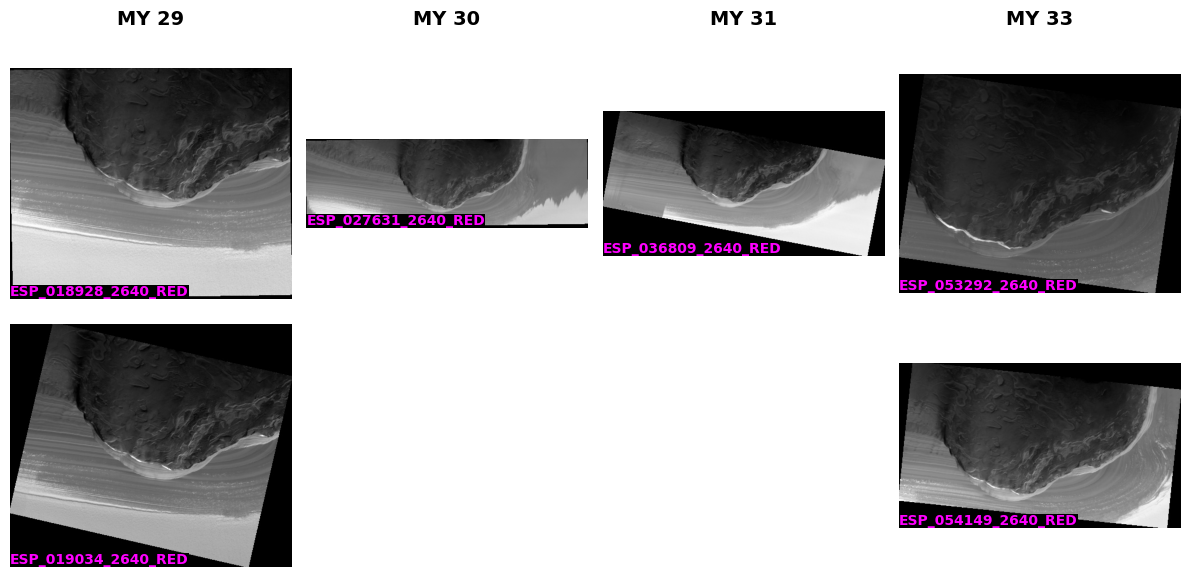

In [6]:
index.show_preview(cluster_id=3)

### Retrieve from HiRISE archive
We finalize our selection by specifying which products to exclude (e.g. `'PSP_001800_2640_RED'`) and whether to choose the top overlaping candidates for each Mars Year (`allign=True`). As a results one image is downloaded per each unique year.

In [7]:
# exclude = ['PSP_001800_2640_RED']
index.download_images(cluster_id=3, allign=True, reload=False)

ESP_019034_2640_RED.JP2 already exists. Set `reload = True` to force download.
ESP_027631_2640_RED.JP2 already exists. Set `reload = True` to force download.
ESP_036809_2640_RED.JP2 already exists. Set `reload = True` to force download.
ESP_054149_2640_RED.JP2 already exists. Set `reload = True` to force download.
